In [464]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [465]:
data = pd.read_csv("Position_Salaries.csv")
X = np.array(data.iloc[:, 1:2].values)
y = np.array(data.iloc[:, -1].values)

In [466]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [467]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [468]:
from sklearn.preprocessing import StandardScaler
std_X = StandardScaler()
std_y = StandardScaler()
X = std_X.fit_transform(X)
y = std_y.fit_transform(y.reshape(len(y), 1))

In [469]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [470]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [471]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y.reshape(len(y),))

SVR()

In [472]:
std_y.inverse_transform(regressor.predict(std_X.transform([[6.5]])).reshape(-1, 1))

array([[170370.0204065]])

In [473]:
print(std_X.inverse_transform(X))

[[ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]]


In [474]:
std_y.inverse_transform(regressor.predict(X).reshape(-1, 1))

array([[ 73474.15615697],
       [ 70786.94584626],
       [ 88213.00902103],
       [108254.98574956],
       [122574.52250599],
       [145503.10688572],
       [209410.23132923],
       [330606.89204569],
       [471671.95587315],
       [557821.75899897]])

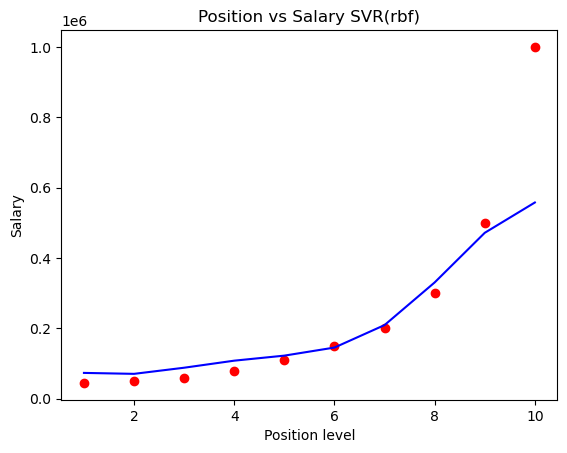

In [475]:
plt.scatter(std_X.inverse_transform(X), std_y.inverse_transform(y), color='red')
plt.plot(std_X.inverse_transform(X), std_y.inverse_transform(regressor.predict(X).reshape(-1, 1)), color='blue')
plt.title('Position vs Salary SVR(rbf)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [476]:
X_grid = np.arange(std_X.inverse_transform(X).min(), std_X.inverse_transform(X).max(), 0.1)
X_grid = X_grid.reshape(len(X_grid),1)
print(X_grid)

[[1. ]
 [1.1]
 [1.2]
 [1.3]
 [1.4]
 [1.5]
 [1.6]
 [1.7]
 [1.8]
 [1.9]
 [2. ]
 [2.1]
 [2.2]
 [2.3]
 [2.4]
 [2.5]
 [2.6]
 [2.7]
 [2.8]
 [2.9]
 [3. ]
 [3.1]
 [3.2]
 [3.3]
 [3.4]
 [3.5]
 [3.6]
 [3.7]
 [3.8]
 [3.9]
 [4. ]
 [4.1]
 [4.2]
 [4.3]
 [4.4]
 [4.5]
 [4.6]
 [4.7]
 [4.8]
 [4.9]
 [5. ]
 [5.1]
 [5.2]
 [5.3]
 [5.4]
 [5.5]
 [5.6]
 [5.7]
 [5.8]
 [5.9]
 [6. ]
 [6.1]
 [6.2]
 [6.3]
 [6.4]
 [6.5]
 [6.6]
 [6.7]
 [6.8]
 [6.9]
 [7. ]
 [7.1]
 [7.2]
 [7.3]
 [7.4]
 [7.5]
 [7.6]
 [7.7]
 [7.8]
 [7.9]
 [8. ]
 [8.1]
 [8.2]
 [8.3]
 [8.4]
 [8.5]
 [8.6]
 [8.7]
 [8.8]
 [8.9]
 [9. ]
 [9.1]
 [9.2]
 [9.3]
 [9.4]
 [9.5]
 [9.6]
 [9.7]
 [9.8]
 [9.9]]


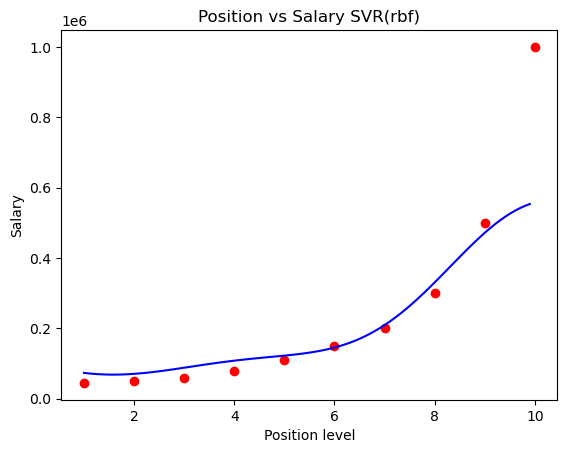

In [477]:
plt.scatter(std_X.inverse_transform(X), std_y.inverse_transform(y), color='red')
plt.plot(X_grid, std_y.inverse_transform(regressor.predict(std_X.transform(X_grid)).reshape(-1, 1)), color='blue')
plt.title('Position vs Salary SVR(rbf)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()